In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
df_app = pd.read_csv(r'C:\Users\Samridhi Gupta\OneDrive\Desktop\application_data.csv')

In [5]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode.

In [6]:
df_app.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

##### Shape of the dataset

In [7]:
df_app.shape

(307511, 122)

In [8]:
100*df_app['TARGET'].value_counts()/len(df_app['TARGET'])

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

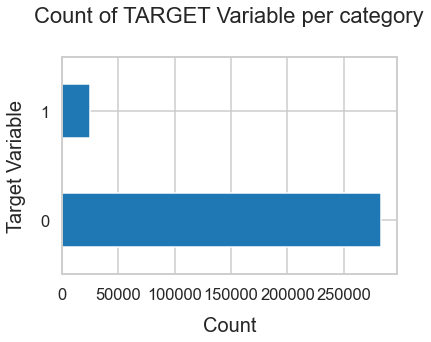

In [84]:
df_app['TARGET'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);




Data is highly imbalanced, ratio = 92:8

Most of the loans were paid back on time as we can see in (target 0)

So we analyse the data with other features while taking the target values separately to get some insights.

### Missing Data

Many columns have a lot of missing data (30-70%), some have few missing data (14-19%) and many columns also have no missing data at all.

For columns with less missing values- can use regression to predict the missing values or fill with the mean of the values present.

For columns with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.

As there's no thumb rule on what criteria do we delete the columns with high number of missing values, we do a small analysis below and take some decisions.

###### Check the columns having more than 30% null values (NaNs). Combining the columns having more than 30% null values along with Description for a better understanding.


In [11]:
emptycol=df_app.isnull().sum()
emptycol=emptycol[emptycol.values>(0.3*len(emptycol))]

In [12]:
emptycol_df = pd.DataFrame(emptycol)
emptycol_df = emptycol_df.reset_index()
emptycol_df = emptycol_df.rename(columns={"index": "Row", "0": "count"})

### Initial intuition from the data having null values greater than 30%

Total columns having more than 30% of null values: 64

As there's no such thumb rule to drop the variables having more than 30% null values, as scenarios might vary from case to case, and the amount of information we think the variable has. For example, most of the columns are Normalized information, and the description is bit unclear, hence I will remove all the Normalized information columns.

However, I will try to keep these columns: AMT_GOODS_PRICE, OWN_CAR_AGE, OCCUPATION_TYPE and analyse further, as these columns seems to carry some important information and two of them are connected with people who have taken Consumer loans, people having their own car flag as Y, and the occupation type might have an impact on the analysis, hence, once proper analysis has been done, we can think of deleting or keeping these variables

In the later stage, we can also analyse the other 61 columns that we are deleting if they carry any important information or not.

C:\python anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


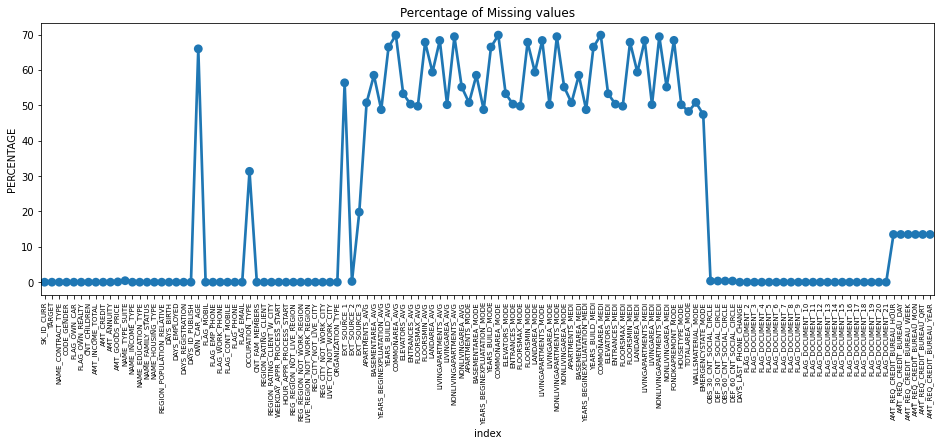

In [13]:
missing = pd.DataFrame((df_app.isnull().sum())*100/df_app.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [14]:
emptycol = list(emptycol[emptycol.values>=0.3].index)

In [15]:
emptycol.remove('AMT_GOODS_PRICE')
emptycol.remove('OWN_CAR_AGE')
emptycol.remove('OCCUPATION_TYPE')


In [16]:
len(emptycol)

61

In [17]:
df_app.drop(labels=emptycol,axis=1,inplace=True)
print(len(emptycol))

61


###### Checking the columns having less null percentage¶

In [18]:
df_app.isnull().sum()/len(df_app)*100

SK_ID_CURR            0.0
TARGET                0.0
NAME_CONTRACT_TYPE    0.0
CODE_GENDER           0.0
FLAG_OWN_CAR          0.0
                     ... 
FLAG_DOCUMENT_17      0.0
FLAG_DOCUMENT_18      0.0
FLAG_DOCUMENT_19      0.0
FLAG_DOCUMENT_20      0.0
FLAG_DOCUMENT_21      0.0
Length: 61, dtype: float64

Here 'AMT_ANNUITY' columns is having very few null values rows. Hence we will impute the missing values.


Since this column is having an outlier which is very large it will be inappropriate to fill those missing values with mean therefore we will fill those missing banks with median value.

In [19]:
#Filling missing values with median

In [20]:
values=df_app['AMT_ANNUITY'].median()

df_app.loc[df_app['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [21]:
#Columns having null values

In [22]:
df_app.isnull().sum()

SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
                     ..
FLAG_DOCUMENT_17      0
FLAG_DOCUMENT_18      0
FLAG_DOCUMENT_19      0
FLAG_DOCUMENT_20      0
FLAG_DOCUMENT_21      0
Length: 61, dtype: int64

Now, all columns have been with zero null values

Removing rows having null values greater than or equal to 30%

In [23]:
emptyrow=df_app.isnull().sum(axis=1)
emptyrow=list(emptyrow[emptyrow.values>=0.3*len(df_app)].index)
df_app.drop(labels=emptyrow,axis=0,inplace=True)
print(len(emptyrow))

0


In [24]:
#We will remove unwanted columns from this dataset¶

In [109]:
unwanted=['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df_app.drop(labels=unwanted,axis=1,inplace=True)




KeyError: "['FLAG_MOBIL' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE'\n 'FLAG_EMAIL' 'REGION_RATING_CLIENT' 'REGION_RATING_CLIENT_W_CITY'\n 'FLAG_EMAIL' 'REGION_RATING_CLIENT' 'REGION_RATING_CLIENT_W_CITY'\n 'DAYS_LAST_PHONE_CHANGE' 'FLAG_DOCUMENT_2' 'FLAG_DOCUMENT_3'\n 'FLAG_DOCUMENT_4' 'FLAG_DOCUMENT_5' 'FLAG_DOCUMENT_6' 'FLAG_DOCUMENT_7'\n 'FLAG_DOCUMENT_8' 'FLAG_DOCUMENT_9' 'FLAG_DOCUMENT_10' 'FLAG_DOCUMENT_11'\n 'FLAG_DOCUMENT_12' 'FLAG_DOCUMENT_13' 'FLAG_DOCUMENT_14'\n 'FLAG_DOCUMENT_15' 'FLAG_DOCUMENT_16' 'FLAG_DOCUMENT_17'\n 'FLAG_DOCUMENT_18' 'FLAG_DOCUMENT_19' 'FLAG_DOCUMENT_20'\n 'FLAG_DOCUMENT_21'] not found in axis"

There are some columns where the value is mentioned as 'XNA' which means 'Not Available'. So we have to find the number of rows and columns and implement suitable techniques on them to fill those missing values or to delete them.

In [29]:
#For Gender column

In [26]:
df_app[df_app['CODE_GENDER']=='XNA'].shape

(4, 31)

In [31]:
#For Organization column

In [27]:
df_app[df_app['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 31)

So, there are 4 rows from Gender column and 55374 rows from Organization type column

###### Describing the Gender column


In [28]:
df_app['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Since, Female is having the majority and only 4 rows are having NA values, we can update those columns with Gender 'F' as there will be no impact on the dataset.

Updating the column 'CODE_GENDER' with "F" for the dataset

In [34]:
df_app.loc[df_app['CODE_GENDER']=='XNA','CODE_GENDER']='F'
df_app['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

###### Describing the organization type column

In [29]:
df_app['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

So, for column 'ORGANIZATION_TYPE', we have total count of 307511 rows of which 55374 rows are having 'XNA' values. Which means 18% of the column is having this values.
Hence if we drop the rows of total 55374, will not have any major impact on our dataset.

Hence, dropping the rows of total 55374 have 'XNA' values in the organization type column

In [36]:
df_app=df_app.drop(df_app.loc[df_app['ORGANIZATION_TYPE']=='XNA'].index)
df_app[df_app['ORGANIZATION_TYPE']=='XNA'].shape

(0, 31)

## Categorical Analysis

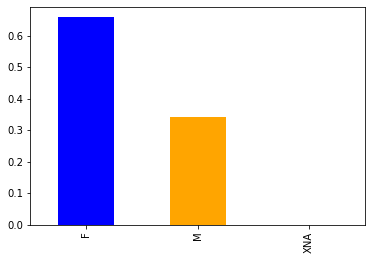

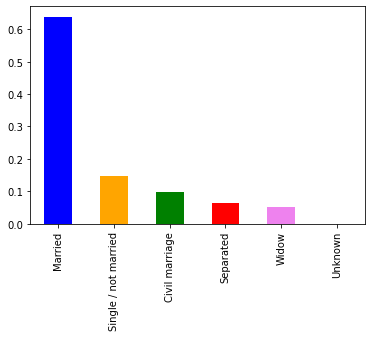

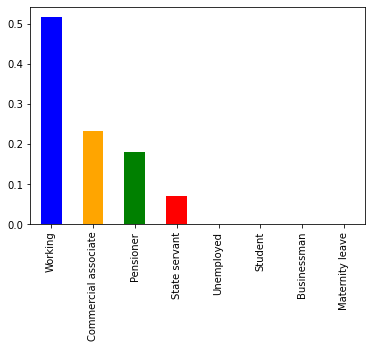

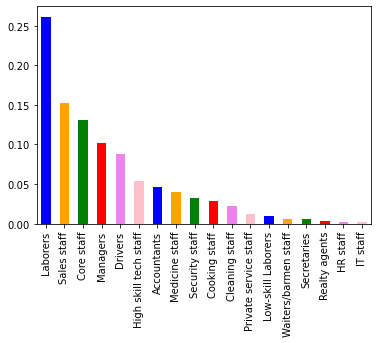

In [30]:
color=['blue','orange','green', 'red', 'violet', 'pink']

df_app.CODE_GENDER.value_counts(normalize=True).plot.bar(color=color)
plt.show()
df_app.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar(color=color)
plt.show()
df_app.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar(color=color)
plt.show()
df_app.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar(color=color)
plt.show()

By just analysing single variables, we won't find much insights related to the defaulters, as here we will just have an idea which category of people are present in abundance, other than that, most of the insights are gathered in analysis of multiple features/variables with target variable.

In [31]:
def plot_features(feature,label_rotation=False,horizontal_layout=True):
    temp = df_app[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'absolute values': temp.values})
    
    t1_percentage = df_app[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    t1_percentage.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    s = sns.barplot(ax=ax1, x = feature, y="absolute values",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
        
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=t1_percentage[feature], data=t1_percentage)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('% of applications where loans were NOT repayed', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.subplots_adjust(wspace = .6)

    plt.show();

In [32]:
categorical= df_app.select_dtypes(include=object).columns
categorical

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

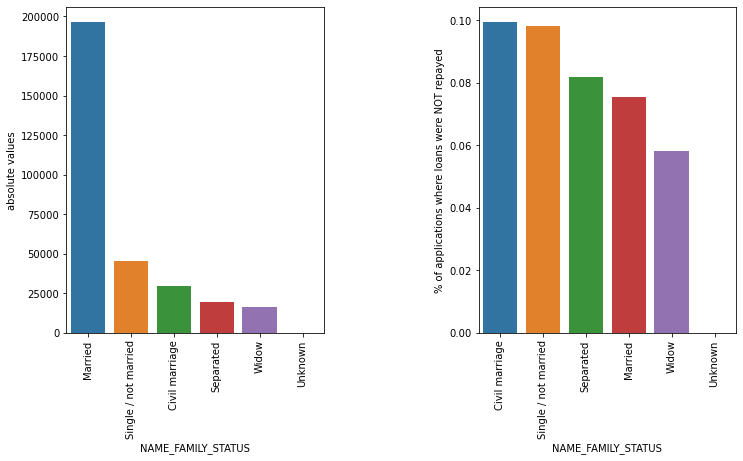

In [33]:
plot_features('NAME_FAMILY_STATUS',True, True)

Most clients are married. Civil marraiges and single people have higher chances of defaulting than others.

In [34]:
df_app['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

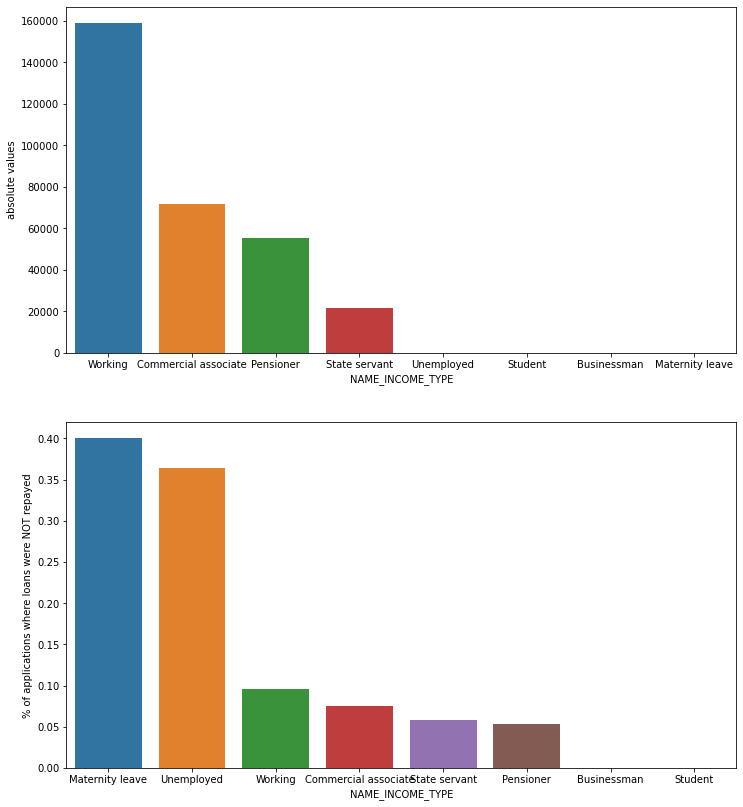

In [35]:
plot_features('NAME_INCOME_TYPE',False,False)

The working class applies the most for loans, and have a very low default rate, hence they are reliable.

clients who are unemployed or on maternity leave have very high defaults rates even though they are a minority compared to other income types.

commercial associates, state servants and pensioners are fairly more reliable.

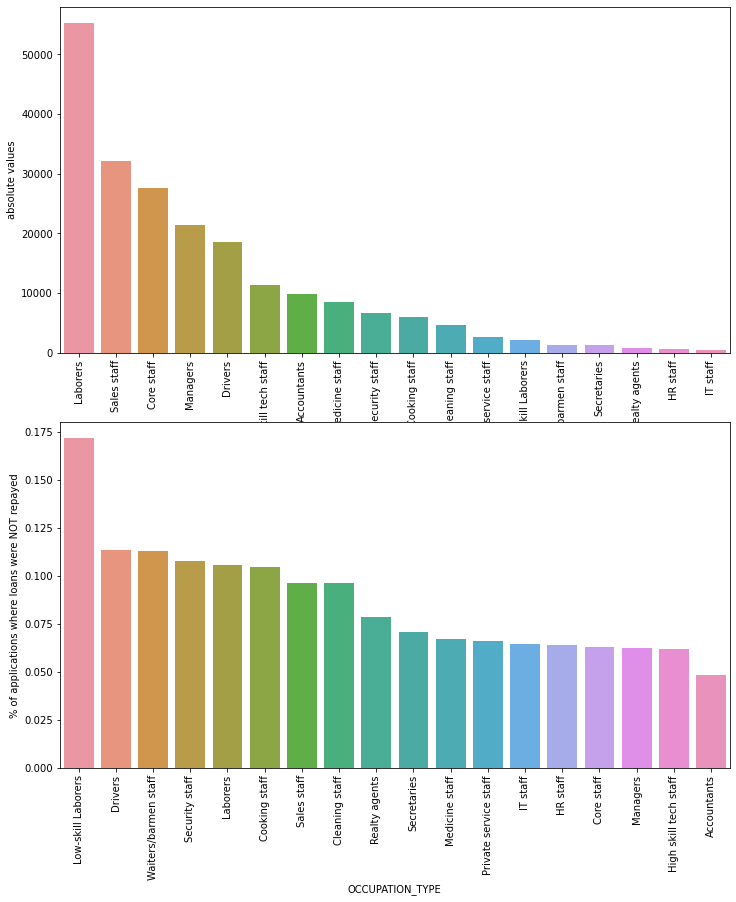

In [36]:
plot_features('OCCUPATION_TYPE',True, False)

Low skilled labourers, waiters, drivers, especially people with less income range are the most likely to be loan defaulters than highly paid staffs and accountants (which is understandable).

Better the occupation, lesser the chance of defaulting.

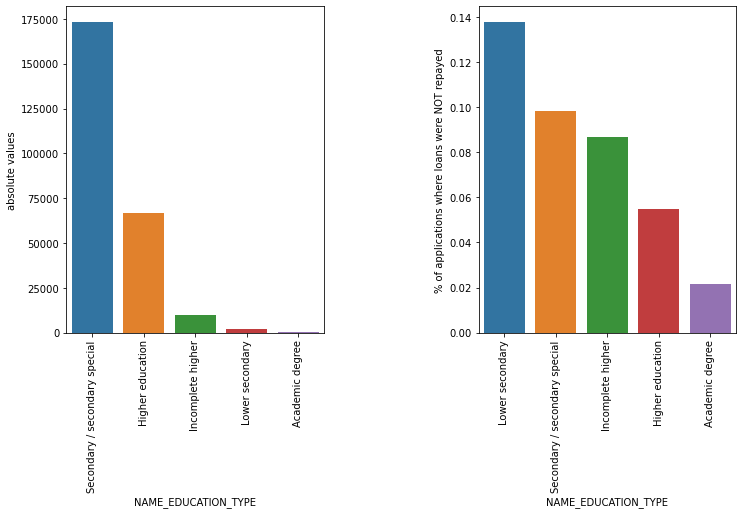

In [46]:
plot_features('NAME_EDUCATION_TYPE',True,True)

Most student loans are for their secondary education or higher education.

Lower secondary education loans are most risky for the company followed by secondary/secondary special.

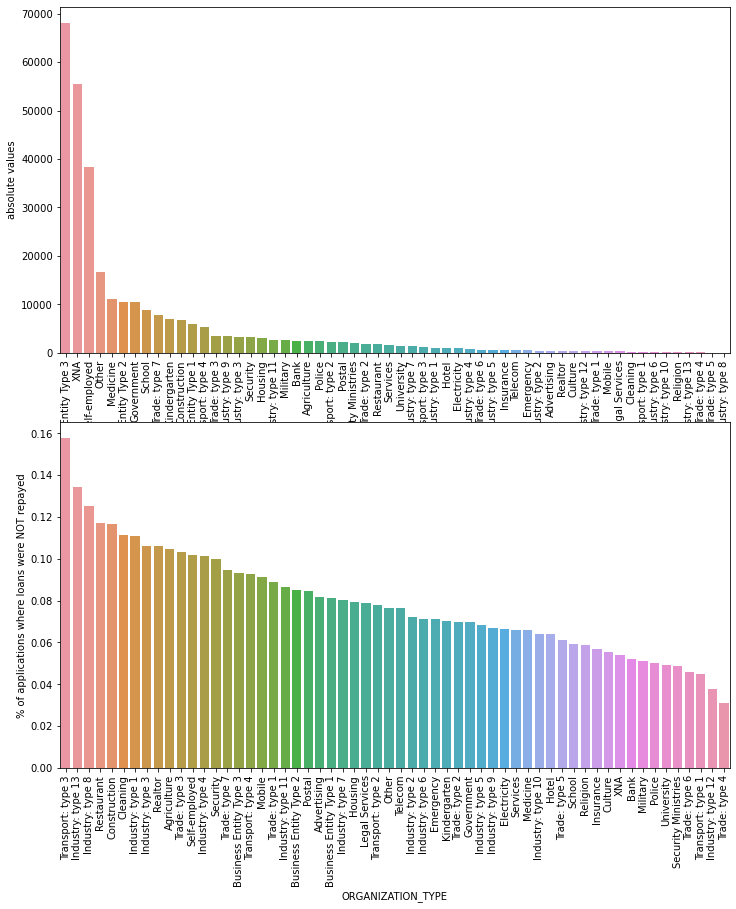

In [37]:
plot_features('ORGANIZATION_TYPE',True, False)

Organizations with highest percent of loans defaulters are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%).
            
Business Entity type 3 Trade: type 4, Industry: type 12 organizations are most reliable.

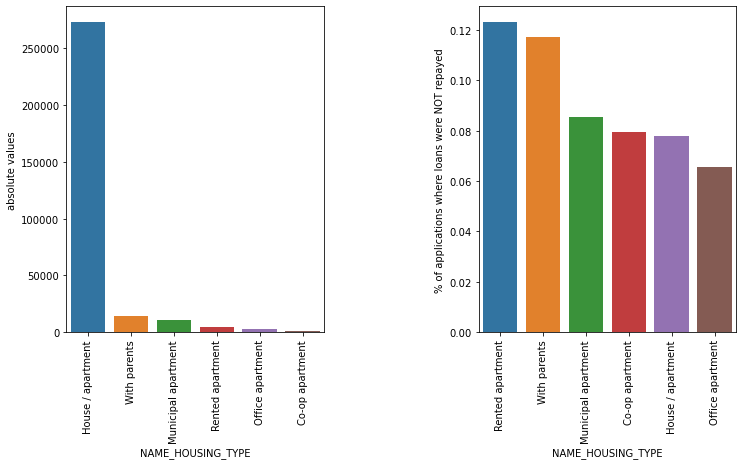

In [38]:
plot_features('NAME_HOUSING_TYPE',True)

Majority applicants have house/apartment type of housing with around 8% default rate.

People living in rented appartments or with parents are very rare but also the most risky.

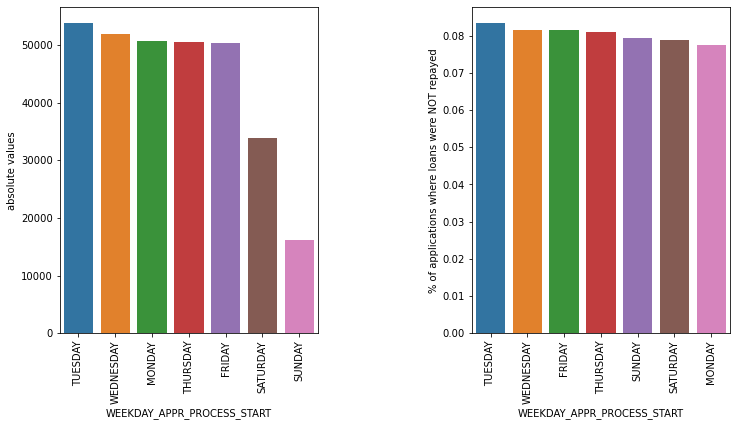

In [39]:
plot_features('WEEKDAY_APPR_PROCESS_START', True)



Weekdays are more common days for loan application but it doesn't give any insight for defaulters.

Most clients are not accompanied by anyone when they apply for loan. There is no significant difference in default rates visible.

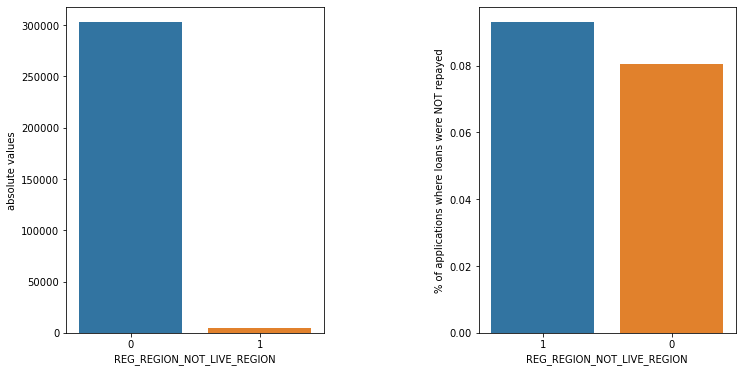

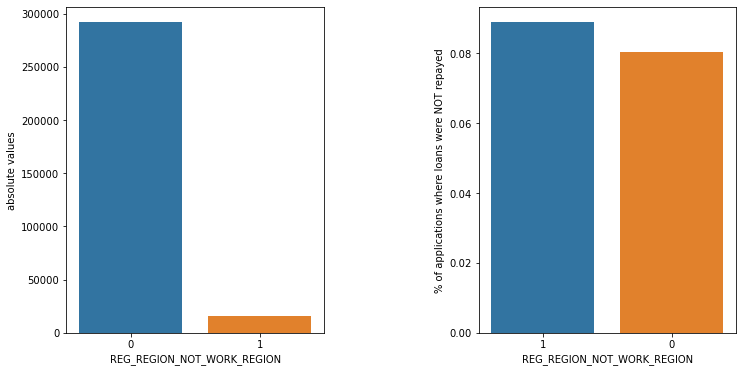

In [40]:
plot_features('REG_REGION_NOT_LIVE_REGION')
plot_features('REG_REGION_NOT_WORK_REGION')

'REG_REGION_NOT_LIVE_REGION'= Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)

'REG_REGION_NOT_WORK_REGION'= Flag if client's permanent address does not match work address (1=different, 0=same, at region level)

Clients who's permanent addresses do not match contact and work address are rare and more likely to default, hence less reliable.

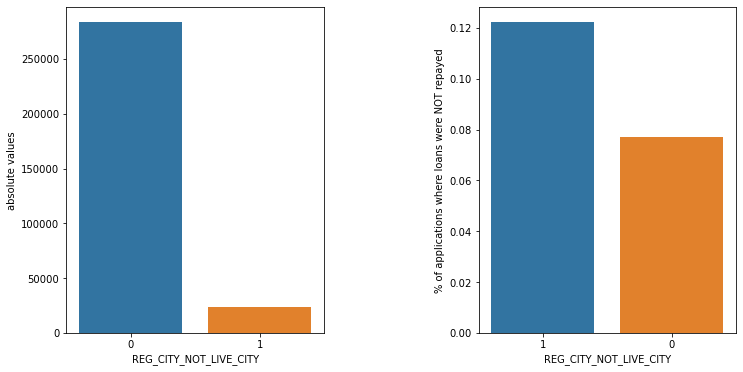

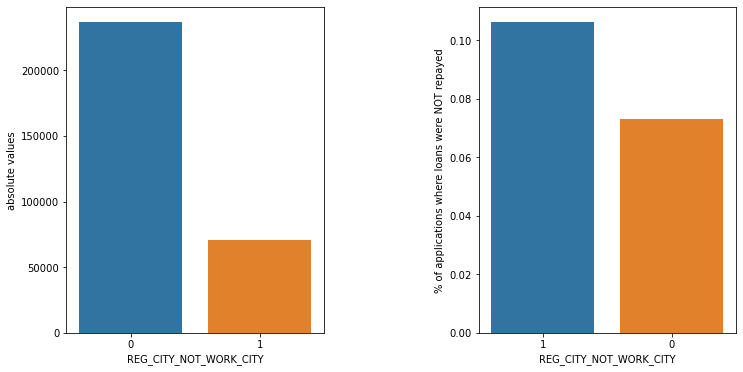

In [41]:
plot_features('REG_CITY_NOT_LIVE_CITY')
plot_features('REG_CITY_NOT_WORK_CITY')

We see the same people are risky here at city level like we saw in the regional level.

As city level has a significant difference in defaulter rates, we don't have to consider regional level as a determining factor.

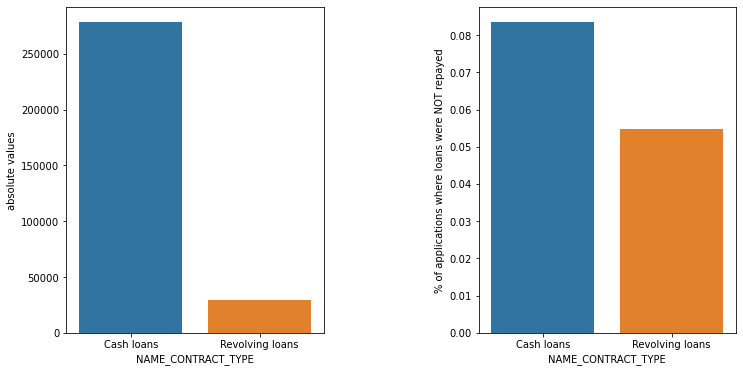

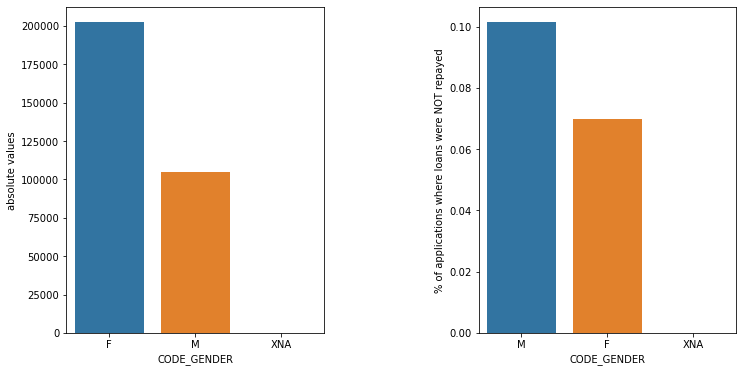

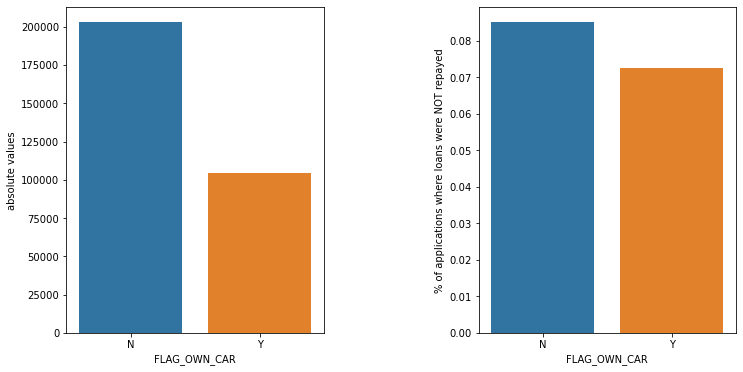

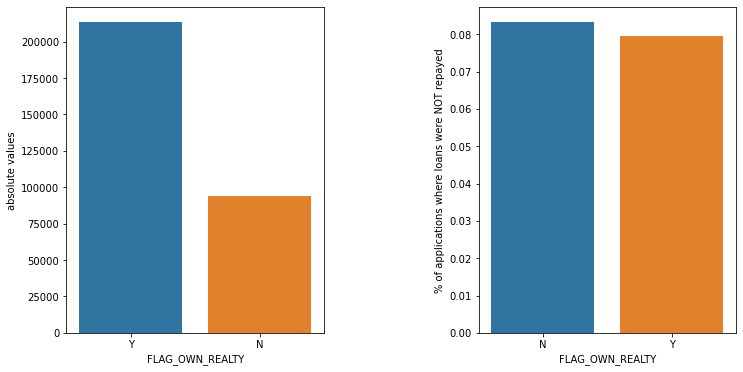

In [42]:
for feature in categorical[:4]:
    plot_features(feature)

1.Most of the cash loans are not repayed as compared to Revolving loans.
2.Males have a higher chance of defaulting compared to women, even though number of female applicants is alomst twice as more. So females are more reliable than men.
3.Clients who own a car are less likely to not repay the loan, which might indicate that Clients with car have a better reliability on loan payments, might be because of multiple reasons (Be it their income range, or some other driving factors)
4.Applicants who own real estate are more than double of the ones who don't own real estate. But both categories have around 8% chance of not repaying the loan. So this column doesn't really give us any good insights.

In [43]:
numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

df_app[numeric_columns]=df_app[numeric_columns].apply(pd.to_numeric)
df_app.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Core staff,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Laborers,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion


##### Derived Metrics

In [ ]:
Now, Creating bins for continous variable categories column 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

###### Creating bins for income amount

In [45]:
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df_app['AMT_INCOME_RANGE']=pd.cut(df_app['AMT_INCOME_TOTAL'],bins,labels=slot)
df_app.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,200000-225000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,MONDAY,11,0,0,0,0,0,0,School,250000-275000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,MONDAY,9,0,0,0,0,0,0,Government,50000-75000
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,125000-150000
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,THURSDAY,11,0,0,0,0,1,1,Religion,100000-125000
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,WEDNESDAY,16,0,0,0,0,0,0,Other,"75000,100000"
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,150000-175000
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,MONDAY,16,0,0,0,0,1,1,Other,350000-375000
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,WEDNESDAY,14,0,0,0,0,0,0,XNA,100000-125000
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,THURSDAY,8,0,0,0,0,0,0,Electricity,125000-150000


###### Dividing the dataset into two dataset of target=1(client with payment difficulties) and target=0(all other)

In [46]:
target0_df_app=df_app.loc[df_app["TARGET"]==0]
target1_df_app=df_app.loc[df_app["TARGET"]==1]

In [47]:
target0_df_app.shape, target1_df_app.shape

((282686, 32), (24825, 32))

In [ ]:
# Calculating Imbalance percentage
Since the majority is target0 and minority is target1

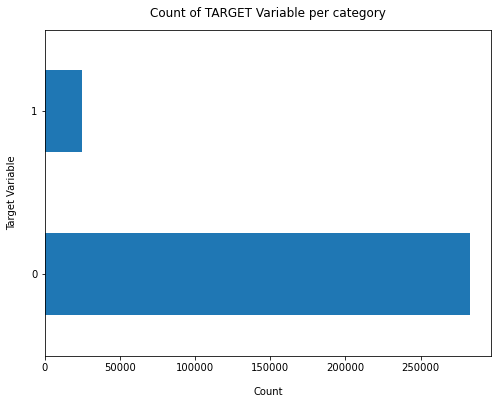

In [49]:
df_app['TARGET'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [50]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

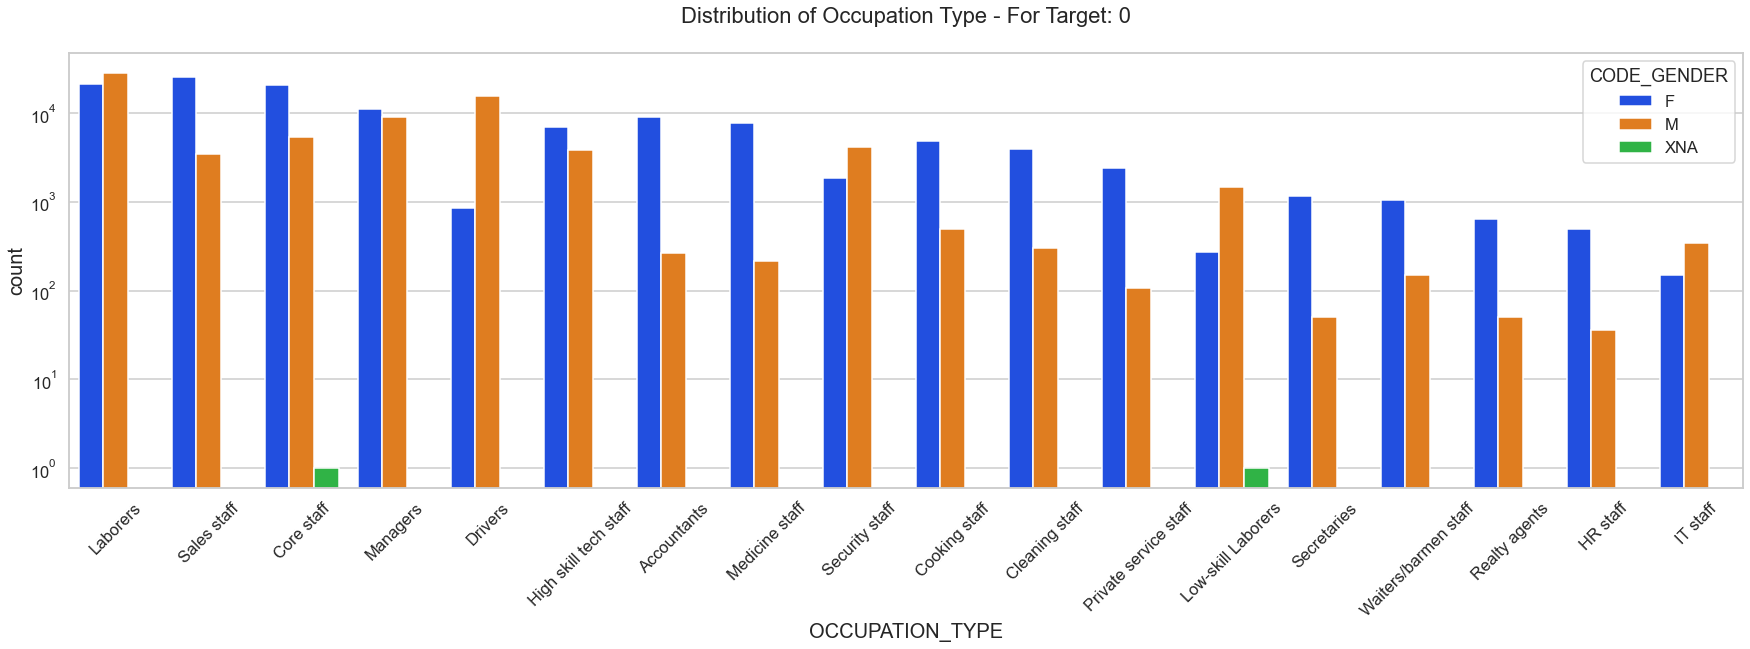

In [51]:
uniplot(target0_df_app,col='OCCUPATION_TYPE',title='Distribution of Occupation Type - For Target: 0',hue='CODE_GENDER')

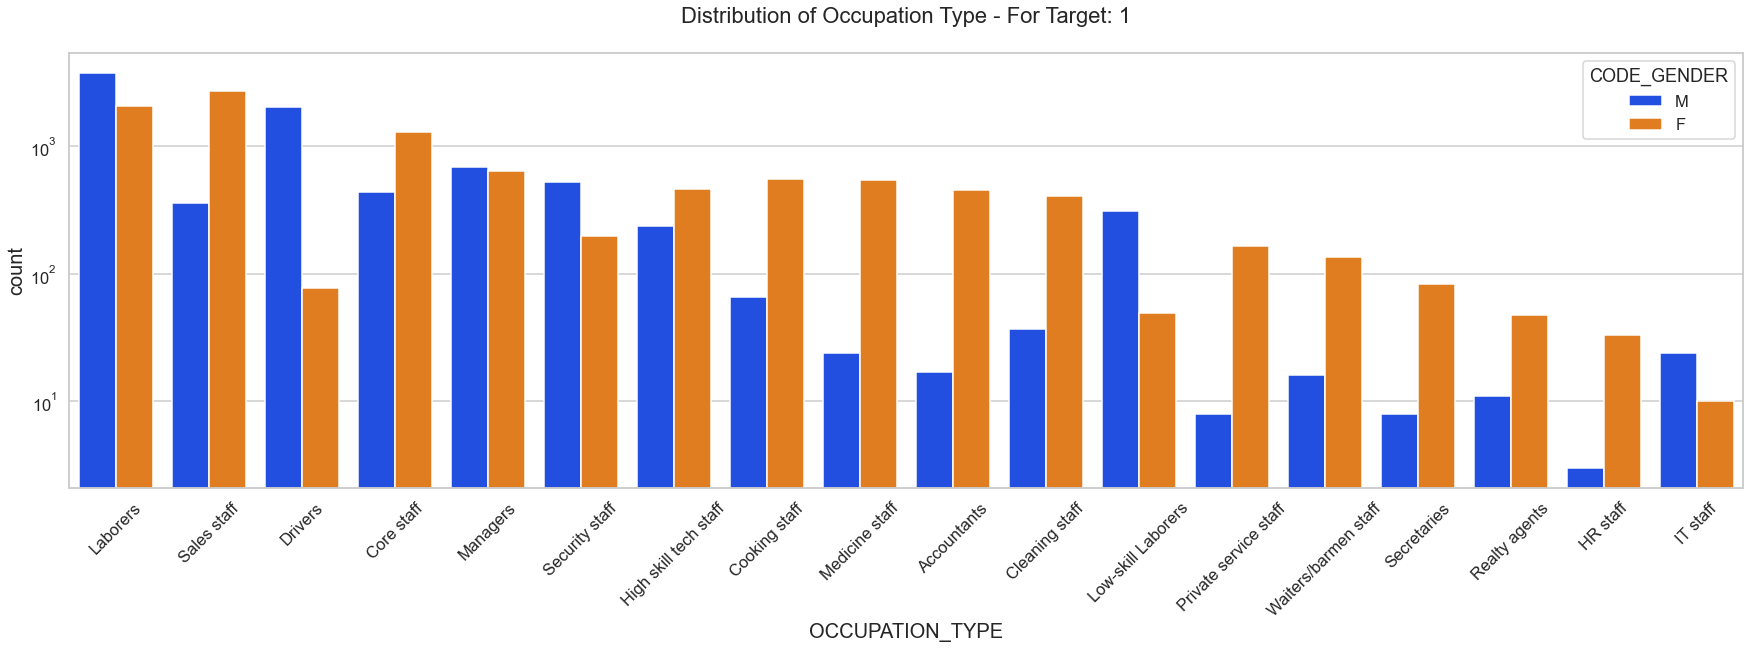

In [52]:
uniplot(target1_df_app,col='OCCUPATION_TYPE',title='Distribution of Occupation Type - For Target: 1',hue='CODE_GENDER')

<AxesSubplot:xlabel='CODE_GENDER', ylabel='OCCUPATION_TYPE'>

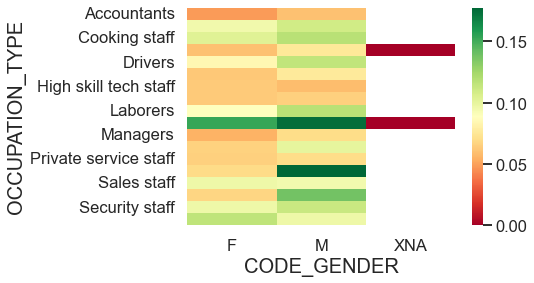

In [53]:
res = pd.pivot_table(data=df_app, index='OCCUPATION_TYPE', columns='CODE_GENDER', values='TARGET')
sns.heatmap(res, annot=False, cmap="RdYlGn")

###### Points to be concluded from the above Gender vs Occupation Type Analysis against Target variable:

1.Female with Occupation type: Accountants, Private Service Staff, Cooking staff, HR staff, and etc professions are the most defaulters as compared to their counterpart males.
2.Male low skill labourers have also high default rate.

Good insight 1: Female under occupation: Accountants, Private Service Staff, Secretaries, Realty Agents, HR Staff etc are the most defaulted sub categories against their male counter parts.

Good insight 2: Male under occupation: Low Skilled Labourers, Drivers etc are the most defaulted sub categories against their female counter parts.

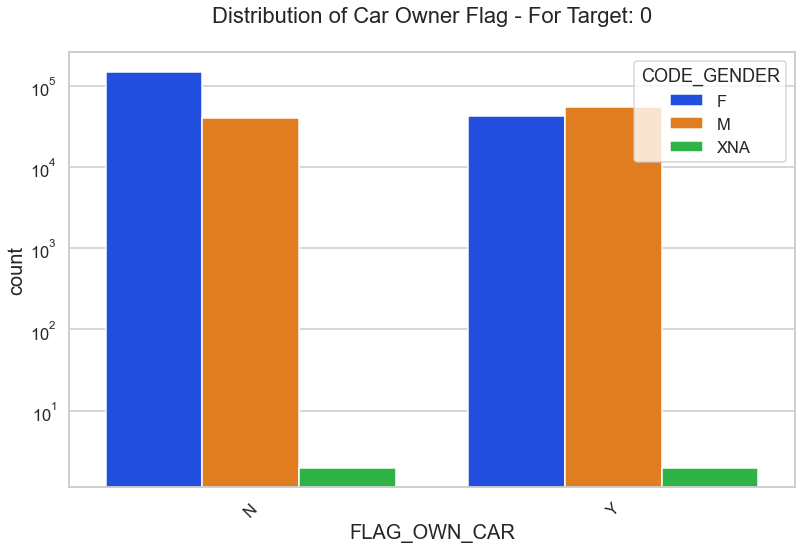

In [54]:
uniplot(target0_df_app,col='FLAG_OWN_CAR',title='Distribution of Car Owner Flag - For Target: 0',hue='CODE_GENDER')

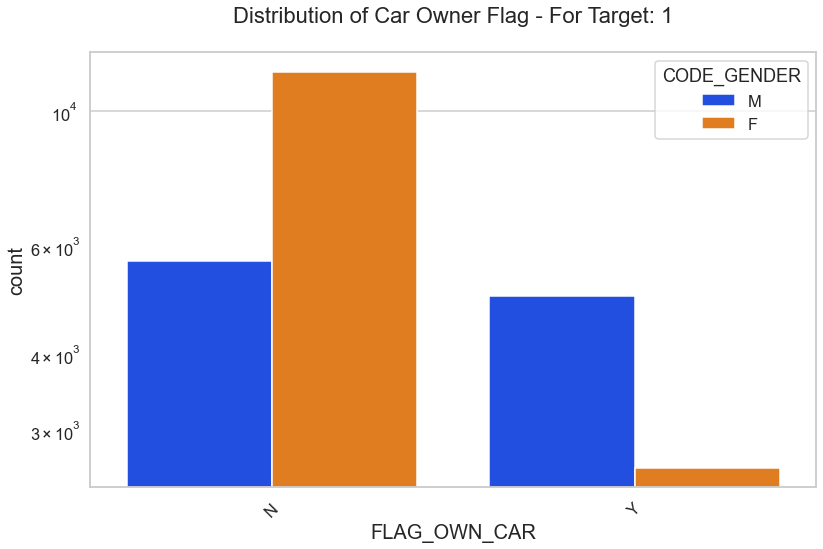

In [55]:
uniplot(target1_df_app,col='FLAG_OWN_CAR',title='Distribution of Car Owner Flag - For Target: 1',hue='CODE_GENDER')

<AxesSubplot:xlabel='CODE_GENDER', ylabel='FLAG_OWN_CAR'>

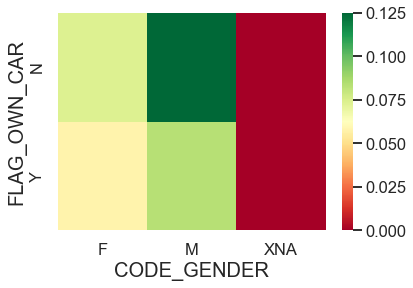

In [56]:
res = pd.pivot_table(data=df_app, index='FLAG_OWN_CAR', columns='CODE_GENDER', values='TARGET')
sns.heatmap(res, annot=False, cmap="RdYlGn")

###### Points to be concluded from the above Gender vs Own Car Flag variable against Target variable:

As per the heatmap, Male candidates without car are the one's with highest default rate as compared to other 3 sub categories.
But as per the bar plot, overall people without cars are most defaulters, if we further dig in, females without car are the most defaulters as compared to the males without cars.

Good insight 1: Overall people without cars are most defaulters, if we further dig in, females without car are the most defaulters as compared to the males without cars.

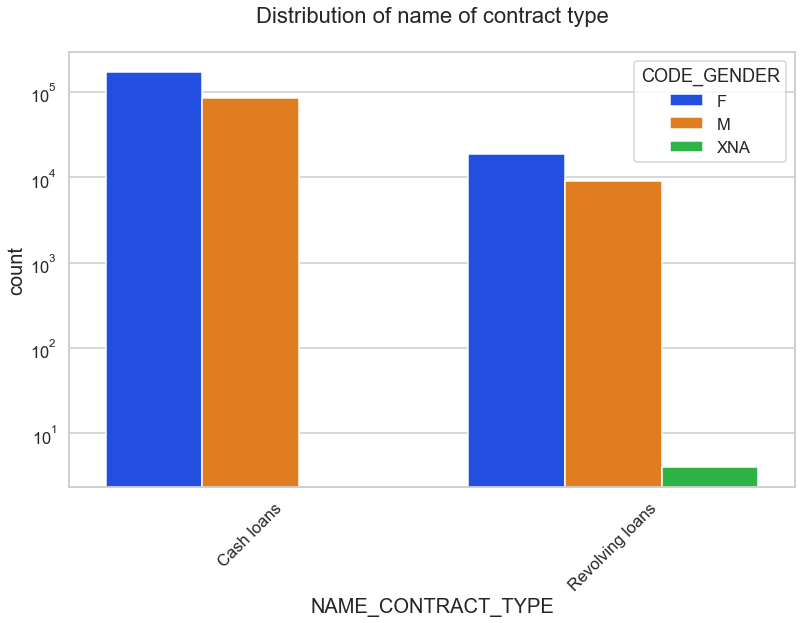

In [57]:
uniplot(target0_df_app,col='NAME_CONTRACT_TYPE',title='Distribution of name of contract type',hue='CODE_GENDER')

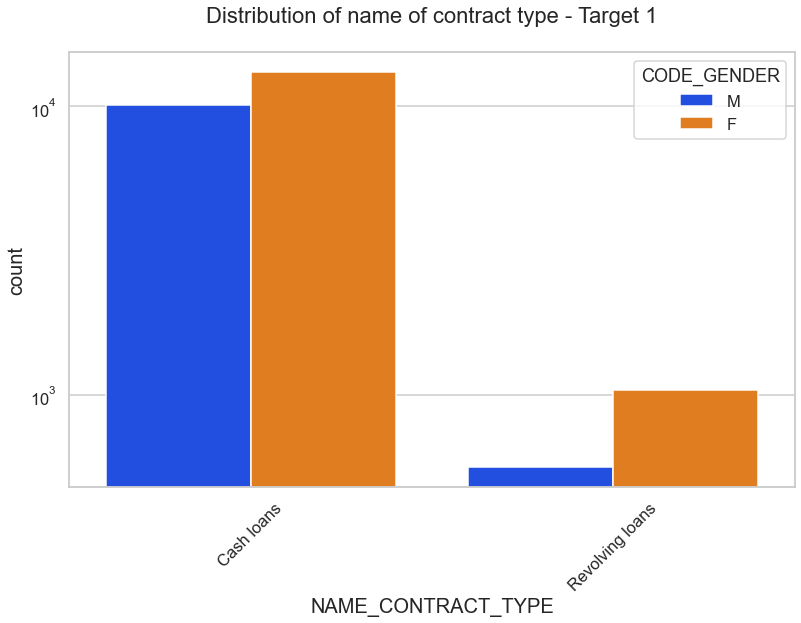

In [58]:
uniplot(target1_df_app,col='NAME_CONTRACT_TYPE',title='Distribution of name of contract type - Target 1',hue='CODE_GENDER')

<AxesSubplot:xlabel='CODE_GENDER', ylabel='NAME_CONTRACT_TYPE'>

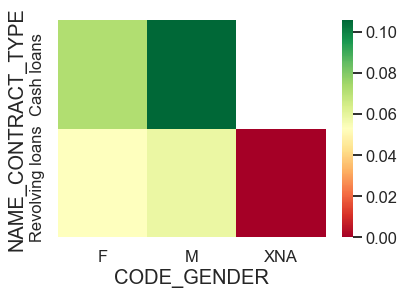

In [59]:
res = pd.pivot_table(data=df_app, index='NAME_CONTRACT_TYPE', columns='CODE_GENDER', values='TARGET')
sns.heatmap(res, annot=False, cmap="RdYlGn")

###### Points to be concluded from the above Gender vs Income Range Analysis against Target variable:

For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
For this also Female is leading for applying credits.

Good insight: As per the heatmap, Male candidates with cash loans are the one's with highest default rate as compared to other 3 sub categories, but analyzing alongwith the bar plot, it's clear that both males/females having cash loans have almost equal ratio in defaulting, but looking at the revolving loans, even though the numbers are less, but the females who have taken revolving loans are the highest defaulters as compared to their male counter parts.

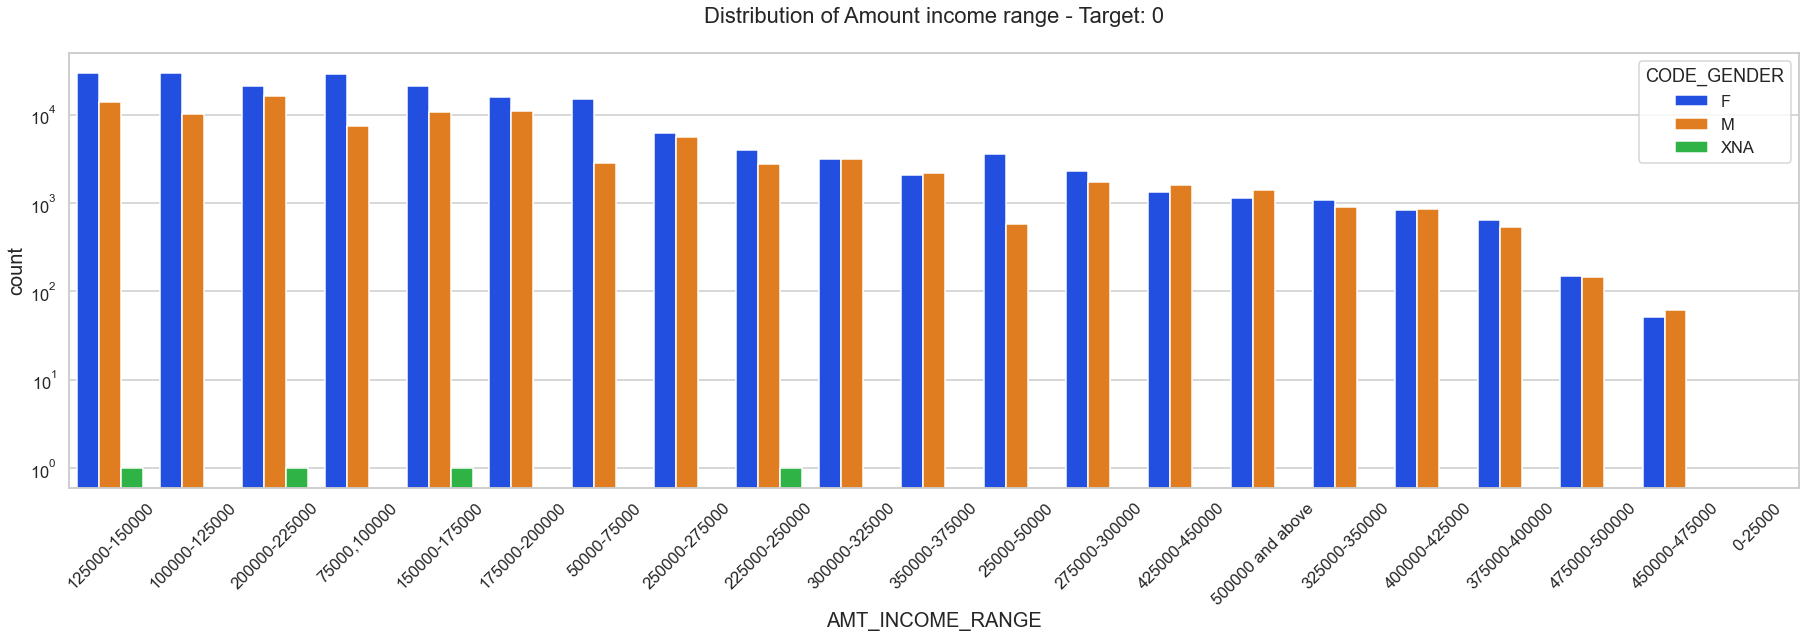

In [60]:
uniplot(target0_df_app,col='AMT_INCOME_RANGE',title='Distribution of Amount income range - Target: 0',hue='CODE_GENDER')

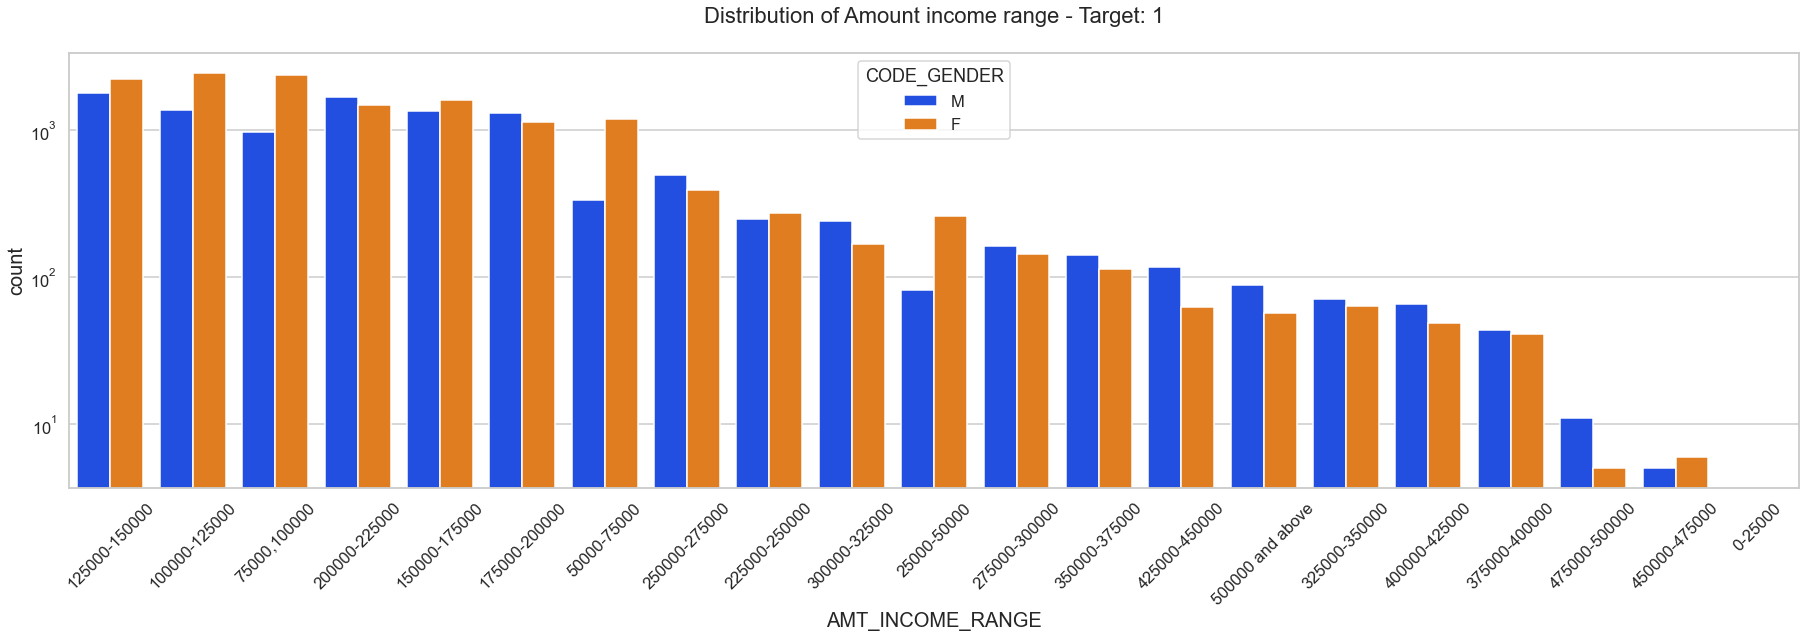

In [61]:
uniplot(target1_df_app,col='AMT_INCOME_RANGE',title='Distribution of Amount income range - Target: 1',hue='CODE_GENDER')

<AxesSubplot:xlabel='CODE_GENDER', ylabel='AMT_INCOME_RANGE'>

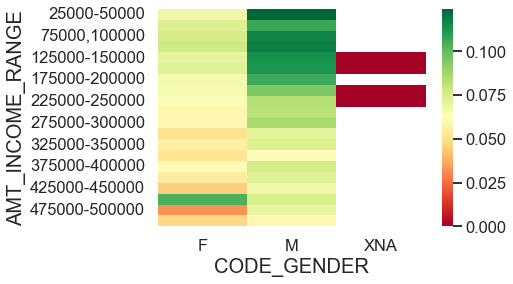

In [62]:
res = pd.pivot_table(data=df_app, index='AMT_INCOME_RANGE', columns='CODE_GENDER', values='TARGET')
sns.heatmap(res, annot=False, cmap="RdYlGn")

###### Points to be concluded from the above Gender vs Income Range Analysis against Target variable:

For target: 0

1. Female counts are higher than male.
2. Income range from 100000 to 200000 is having more number of credits.
3. This graph show that females are more than male in having credits for that range.
4. Very less count for income range 400000 and above.

For target: 1

1. Male counts are higher than female.
2. Income range from 100000 to 200000 is having more number of credits.
3. This graph show that males are more than female in having credits for that range.
4. Very less count for income range 400000 and above.

Good insight: Male: Female ratio is almost 1:2, but looking at the heatmap, overally we can conclude that Male candidates with less income range are the most defaulters, the default rate keeps decreasing as the income range increases.

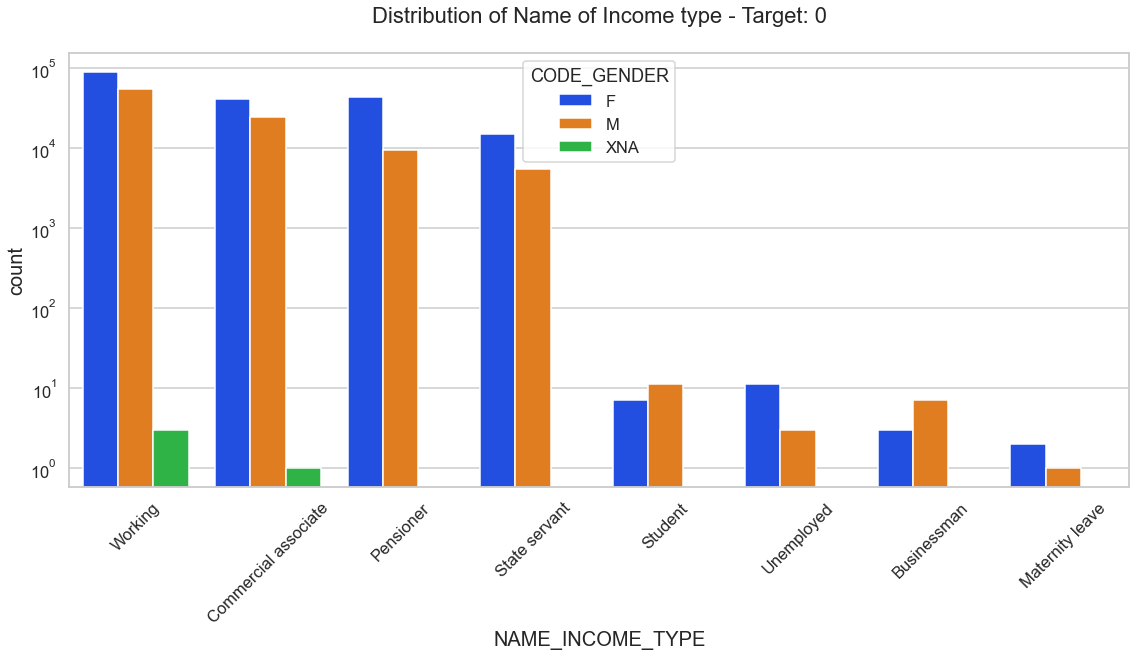

In [63]:
uniplot(target0_df_app,col='NAME_INCOME_TYPE',title='Distribution of Name of Income type - Target: 0',hue='CODE_GENDER')


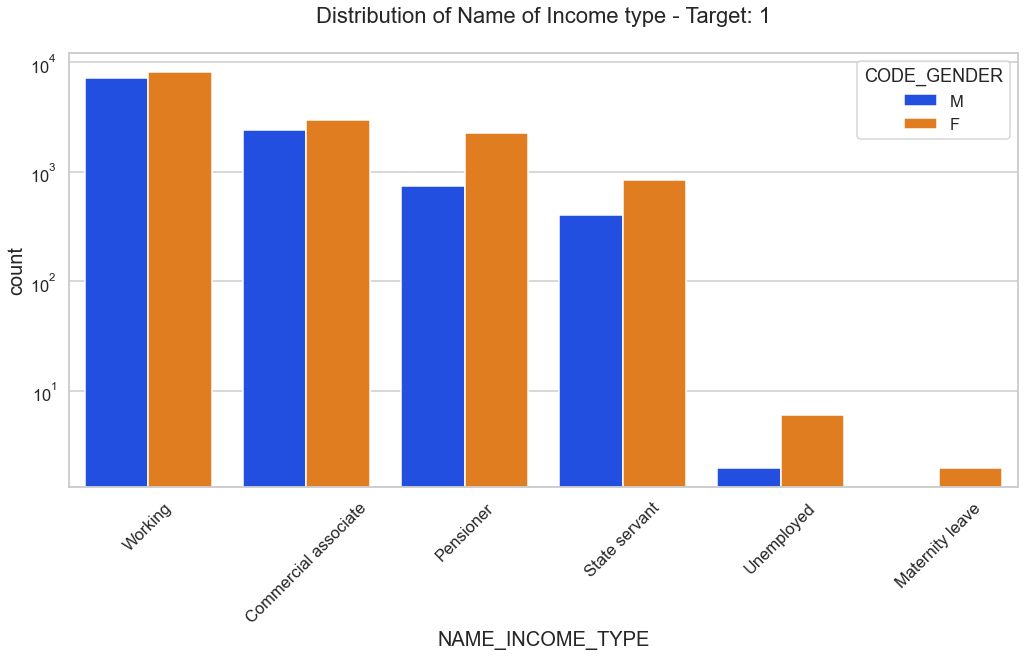

In [64]:
uniplot(target1_df_app,col='NAME_INCOME_TYPE',title='Distribution of Name of Income type - Target: 1',hue='CODE_GENDER')


<AxesSubplot:xlabel='CODE_GENDER', ylabel='NAME_INCOME_TYPE'>

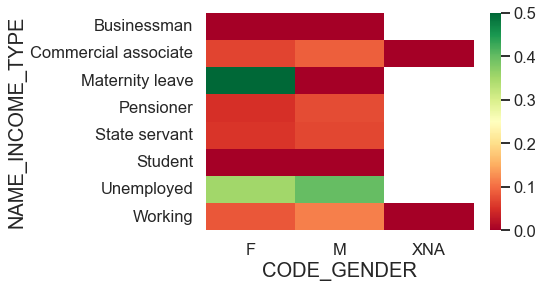

In [65]:
res = pd.pivot_table(data=df_app, index='NAME_INCOME_TYPE', columns='CODE_GENDER', values='TARGET')
sns.heatmap(res, annot=False, cmap="RdYlGn")


###### Points to be concluded from the above Gender vs Name Income Type Analysis against Target variable:

1. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than other i.e. ‘Maternity leave.
2. For this Females are having more number of credits than male.
3. For target value 1: There is no income type for ‘student’ , ’pensioner’ and ‘Businessman’ which means they don’t do any late payments.

Good insight: Females are having marginally higher default rate as compared to males, and most defaulters are working professionals, commercial associates, state servants etc. People with income type: Student, Pensioner, Businessman are not late payers.

#### Plotting for Organization type in logarithmic scale

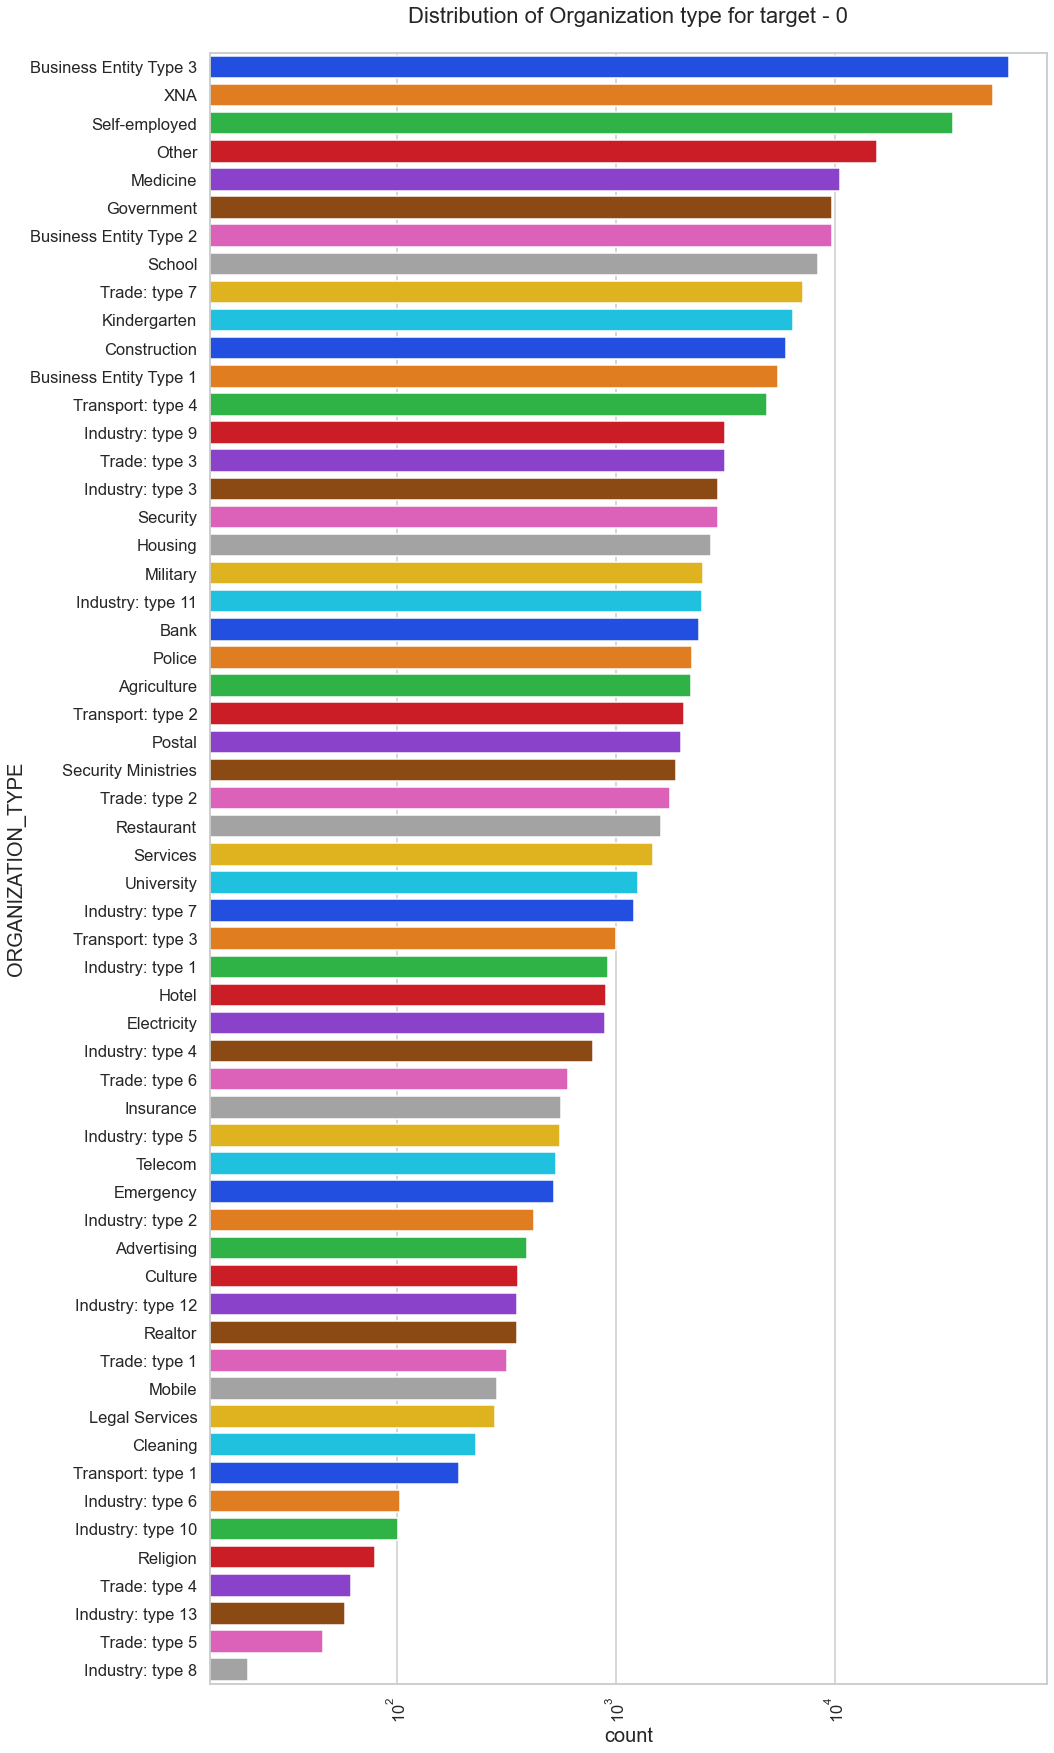

In [66]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df_app,y='ORGANIZATION_TYPE',order=target0_df_app['ORGANIZATION_TYPE'].value_counts().index,palette='bright')

plt.show()


###### Points to be concluded from the above graph.

1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ and ‘Government’.
2. Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.

###### Plotting for Organization type

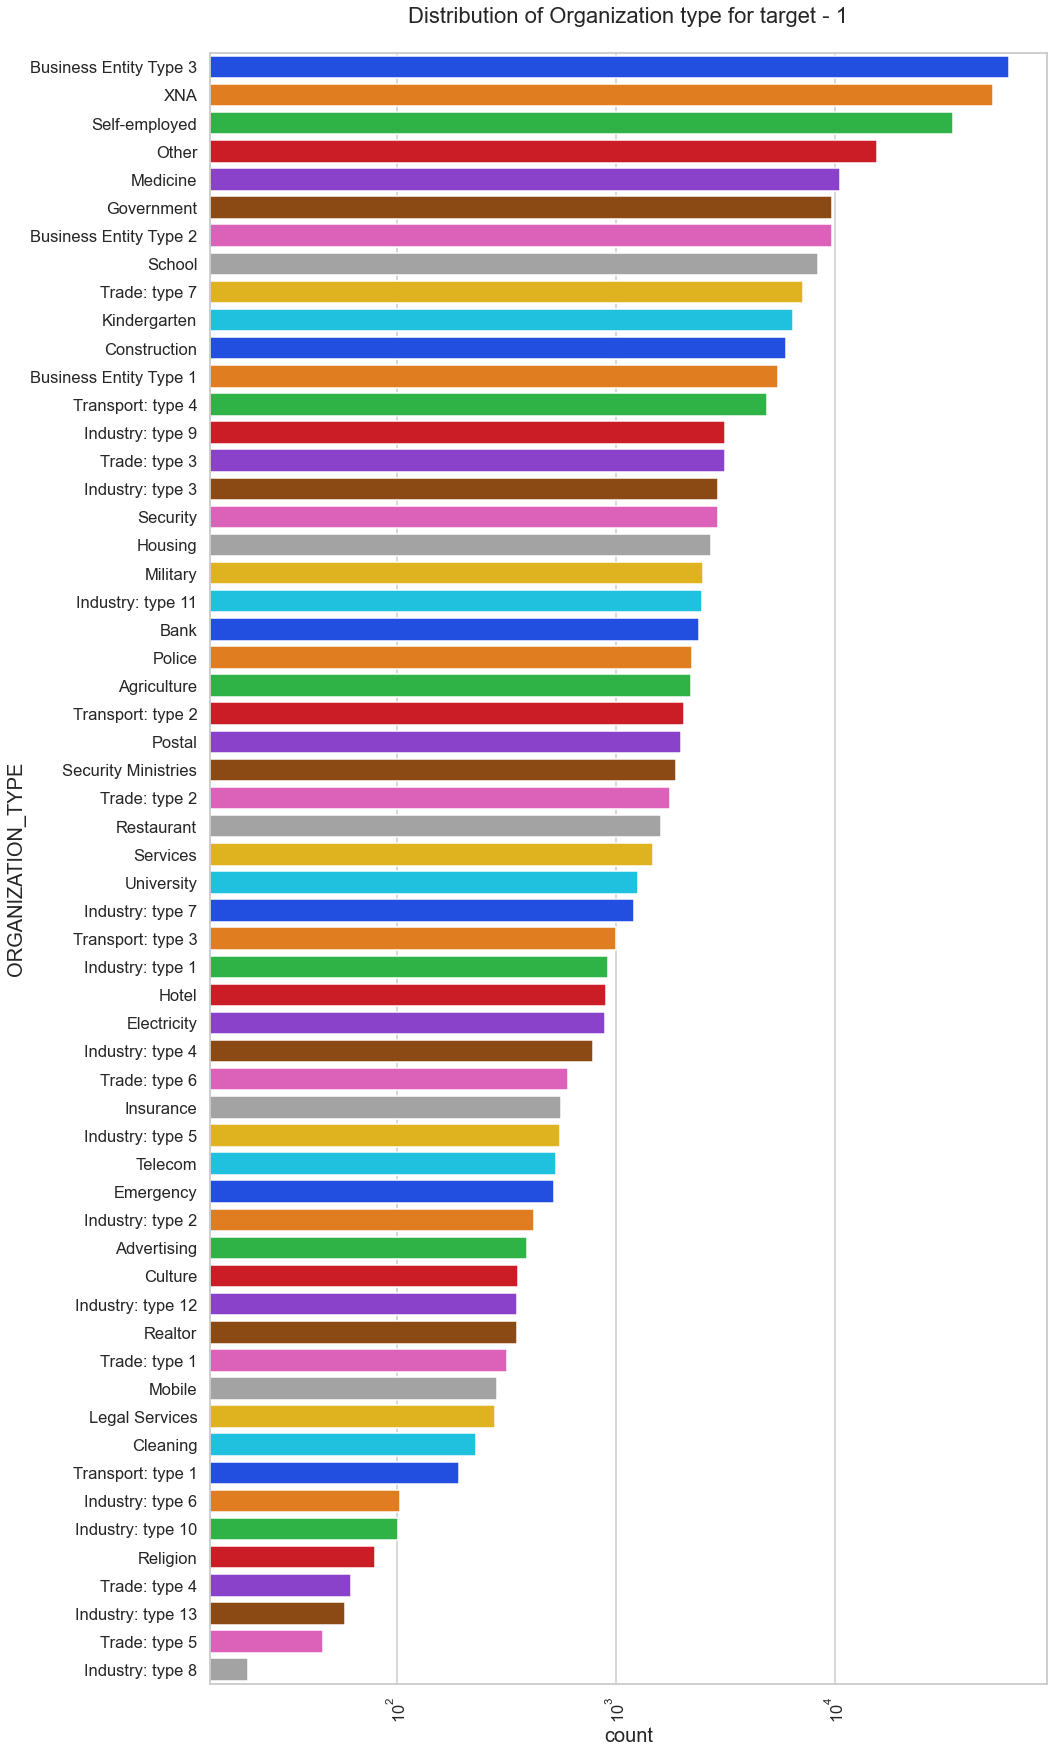

In [67]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df_app,y='ORGANIZATION_TYPE',order=target0_df_app['ORGANIZATION_TYPE'].value_counts().index,palette='bright')

plt.show()

###### Points to be concluded from the above graph.

1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.
2. Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.
3. Same as type 0 in distribution of organization type.

In [68]:
numer= df_app.describe()
numerical= numer.columns
numer

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,5.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,15.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,91.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
numer.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY'],
      dtype='object')

In [70]:
(df_app['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

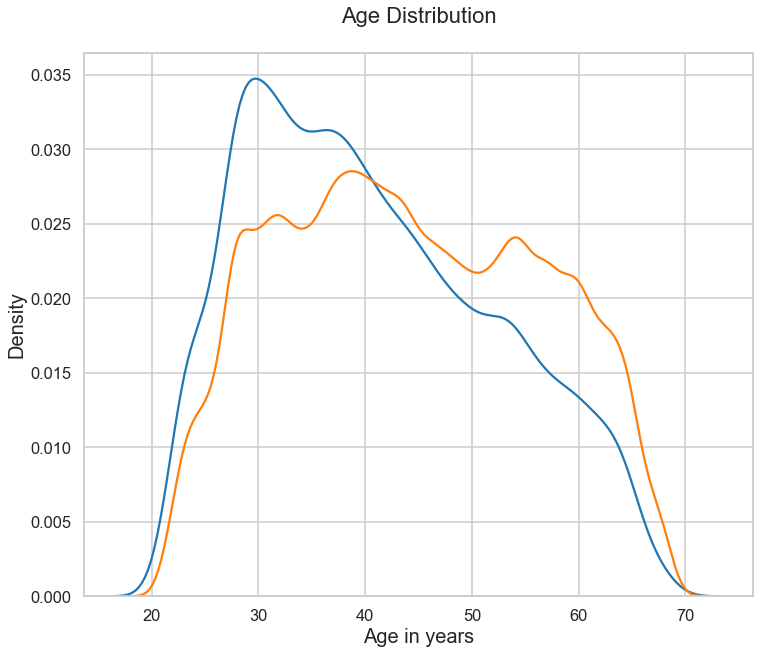

In [71]:
plt.figure(figsize = (12, 10))

sns.kdeplot(df_app.loc[df_app['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'Loan repayed(0)')
sns.kdeplot(df_app.loc[df_app['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'Loan not repayed(1)')
plt.xlabel('Age in years'); 
plt.ylabel('Density'); 
plt.title('Age Distribution');

In [72]:
df_app['DAYS_BIRTH'] = abs(df_app['DAYS_BIRTH'])
df_app['DAYS_BIRTH'].corr(df_app['TARGET'])

-0.07823930830984513

1. As clients get older, they tend to repay their loans on time more often.
2. Younger clients are less reliable than older clients.
3. Even though the correlation (-0.065) is less significant, it does affect the target.

In [73]:
age_data = df_app[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
age_data['AGE_RANGE'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))

age_data = age_data.groupby('AGE_RANGE').mean()
age_data

C:\Users\SAMRID~1\AppData\Local\Temp/ipykernel_10928/2958746092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
C:\Users\SAMRID~1\AppData\Local\Temp/ipykernel_10928/2958746092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['AGE_RANGE'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))


,TARGET,DAYS_BIRTH,YEARS_BIRTH
AGE_RANGE,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


* We bin age into ranges of 5 years and examine trend for each target.

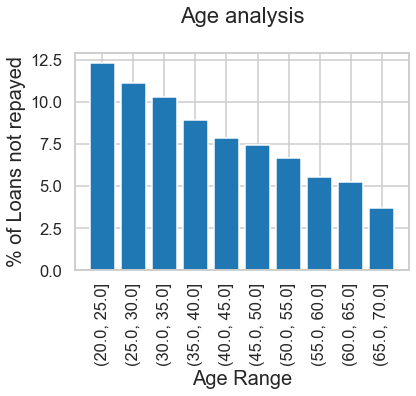

In [74]:
plt.bar(age_data.index.astype(str), 100 * age_data['TARGET'])

plt.xticks(rotation = 90); plt.xlabel('Age Range'); plt.ylabel('% of Loans not repayed')
plt.title('Age analysis');

* This graph is consistent with our analysis above. Young people have 12% default rate while the oldest have only ~4%.
* Maybe young clients can be given extra guidance for financial planning to help reduce this default rate.

In [75]:
def plot_numerical(feature):
    plt.figure(figsize=(10,6))
    plt.title("%s Distribution" % feature)
    sns.distplot(df_app[feature].dropna(), kde=True)
    plt.show()   
    

#### Family Features¶

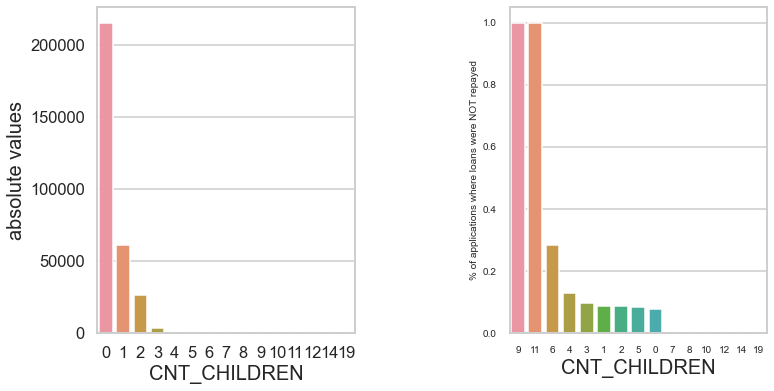

In [76]:
plot_features('CNT_CHILDREN')

* Most clients have no or very few children and are likely to repay loan on time.
* Clients with very high number of children are risky.





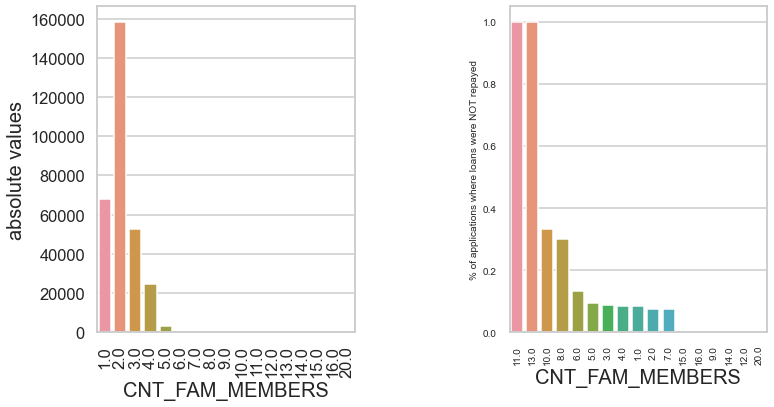

In [94]:
plot_features('CNT_FAM_MEMBERS',True)


#### Amount features

C:\python anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


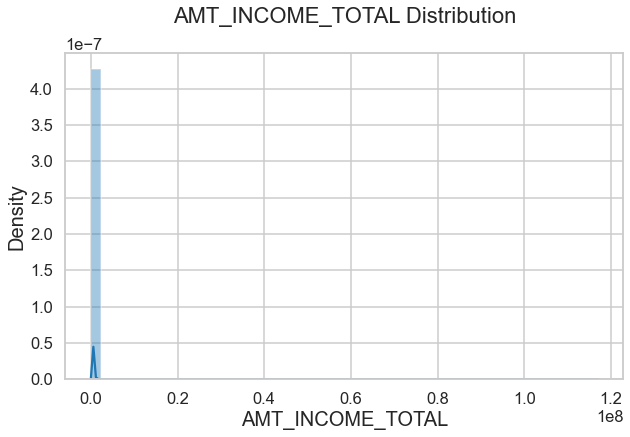

In [95]:
plot_numerical('AMT_INCOME_TOTAL')

C:\python anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


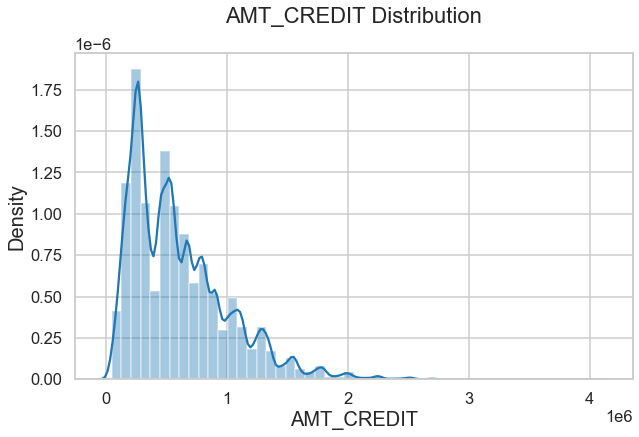

In [96]:
plot_numerical('AMT_CREDIT')

C:\python anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


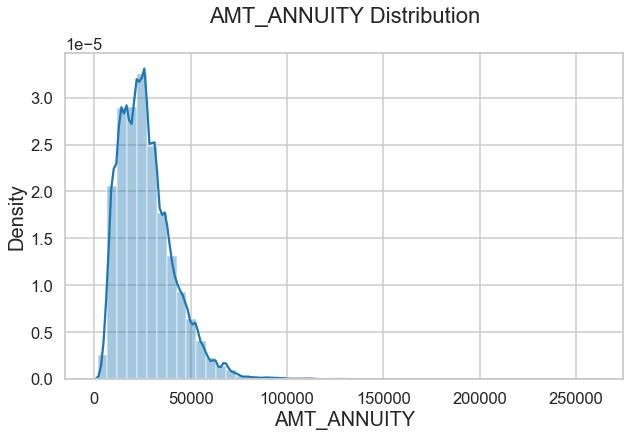

In [97]:
plot_numerical('AMT_ANNUITY')

C:\python anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


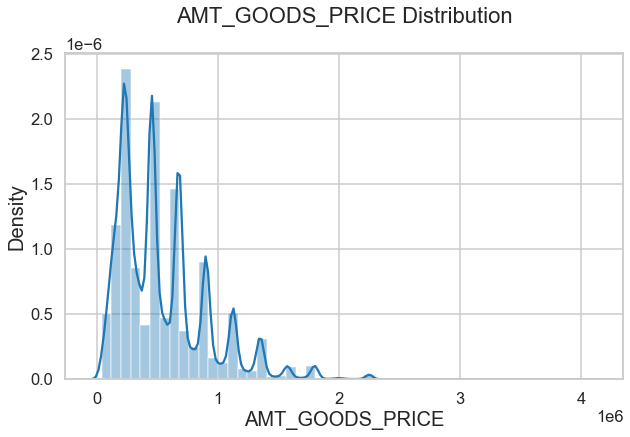

In [98]:
plot_numerical('AMT_GOODS_PRICE')

#### Others

C:\python anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


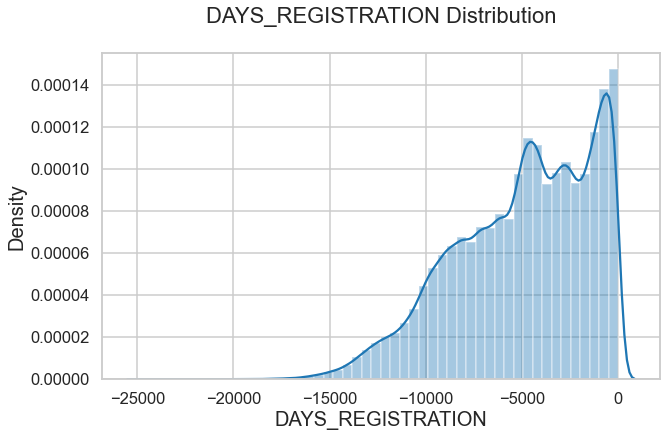

In [99]:
plot_numerical('DAYS_REGISTRATION')

C:\python anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


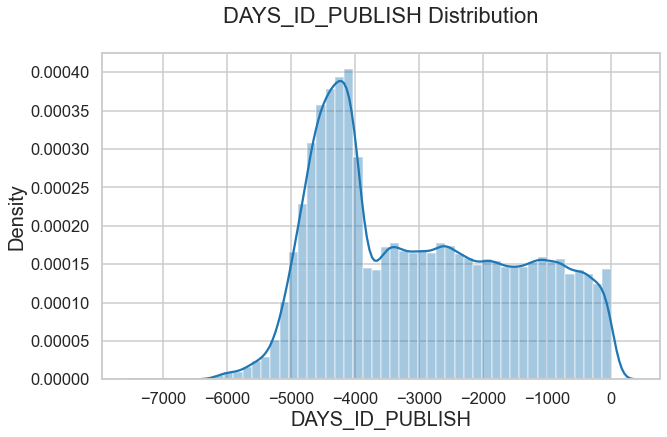

In [100]:
plot_numerical('DAYS_ID_PUBLISH')

* There is no useful insight from distribution of income and other feature values.
* Segmented analysis can be tried to get better understanding.

### Some segmented analysis

In [101]:
def plot_comparisons(features):

    t_1 = df_app.loc[df_app['TARGET'] == 1]
    t_0 = df_app.loc[df_app['TARGET'] == 0]
    i=0
    for feature in features:
        plt.figure(figsize=(12,6))
        i += 1
        sns.kdeplot(t_0[feature], bw=0.5,label="Loans repayed")
        sns.kdeplot(t_1[feature], bw=0.5,label="Loans not repayed")
        plt.ylabel('Density')
        plt.xlabel(feature)
        _, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

C:\python anaconda\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\python anaconda\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\python anaconda\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\python anaconda\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_m

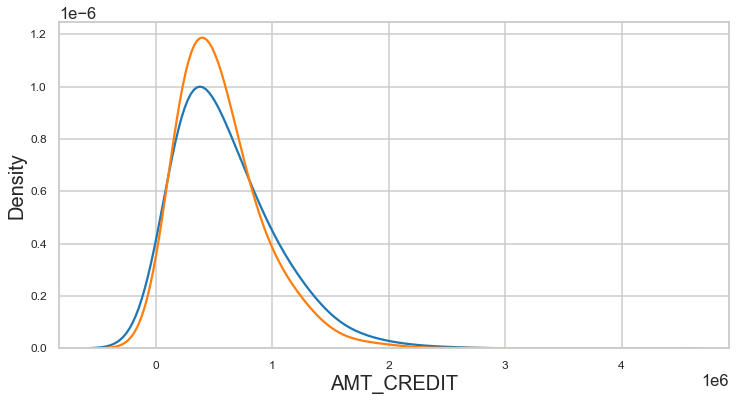

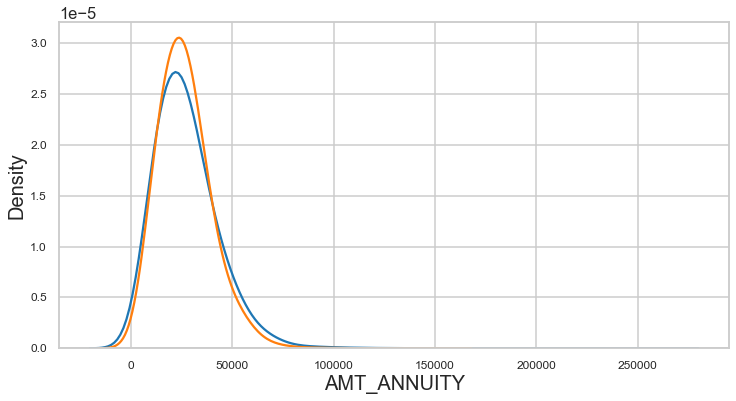

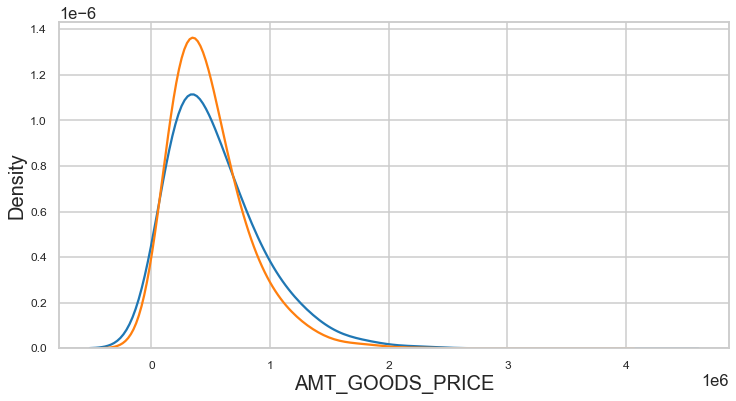

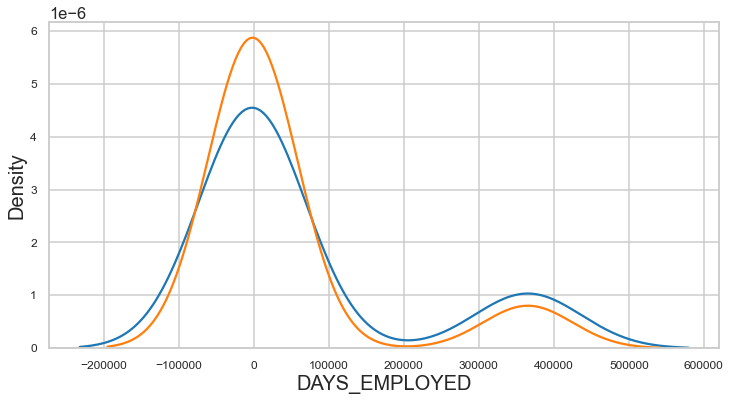

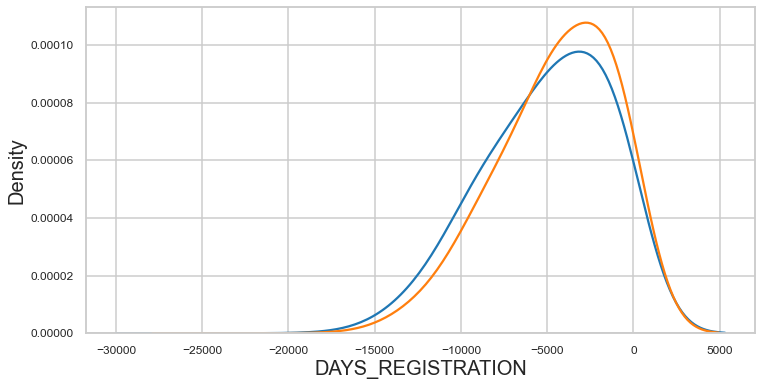

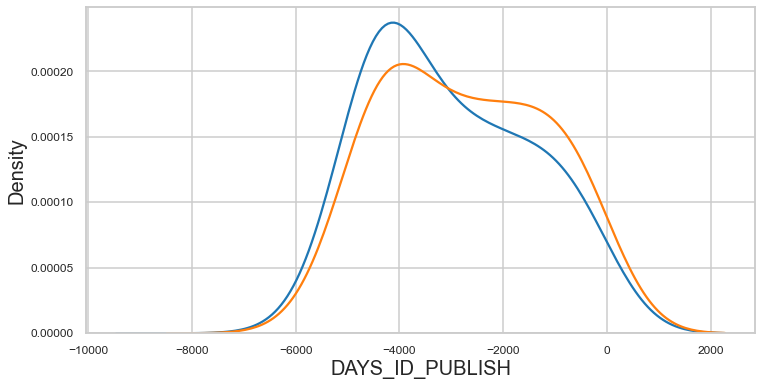

In [102]:
feat = ['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_ID_PUBLISH']
plot_comparisons(feat)


* When clients change their registration closer to application date, they are more likely to default.
* Clients who change their identity documents closer to loan application are less reliable than those who change it well in advance.

### Correlations

In [103]:
app_data_enc = pd.get_dummies(df_app, drop_first=True)

In [104]:
app_data_enc

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,0,1,0,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,0,0,0,0,0,0,0,1,0,0
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,0,0,0,0,0,0,0,1,0,0
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,0,0,0,0,0,0,1,0,0,0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,0,0,0,0,0,0,0,1,0,0


In [105]:
correlations = df_app.corr()['TARGET'].sort_values()
print('Top 10 Positive Correlations:\n', correlations.tail(10))
print('\nTop 10 Negative Correlations:\n', correlations.head(10))

Top 10 Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE    0.031276
DEF_30_CNT_SOCIAL_CIRCLE    0.032248
LIVE_CITY_NOT_WORK_CITY     0.032518
OWN_CAR_AGE                 0.037612
DAYS_REGISTRATION           0.041975
REG_CITY_NOT_LIVE_CITY      0.044395
REG_CITY_NOT_WORK_CITY      0.050994
DAYS_ID_PUBLISH             0.051457
DAYS_BIRTH                  0.078239
TARGET                      1.000000
Name: TARGET, dtype: float64

Top 10 Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


* External sources have highest correlation value with the target.
* These features represent a "normalized score from external data source".

### External Sources

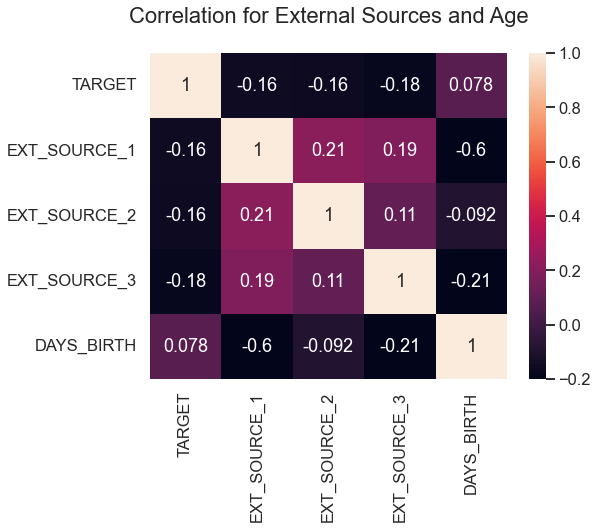

In [106]:
df_app['DAYS_BIRTH']
ext_sc = df_app[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_sc_corrs = ext_sc.corr()

plt.figure(figsize = (8, 6))
sns.heatmap(ext_sc_corrs, vmin = -0.2, annot = True)
plt.title('Correlation for External Sources and Age');

* All three external sources have negative correlations with the target, indicating that as the value of the EXT_SOURCE increases, the client is more likely to repay the loan.
* DAYS_BIRTH is positively correlated with EXT_SOURCE_1 indicating that maybe this external source takes into account the client's age.

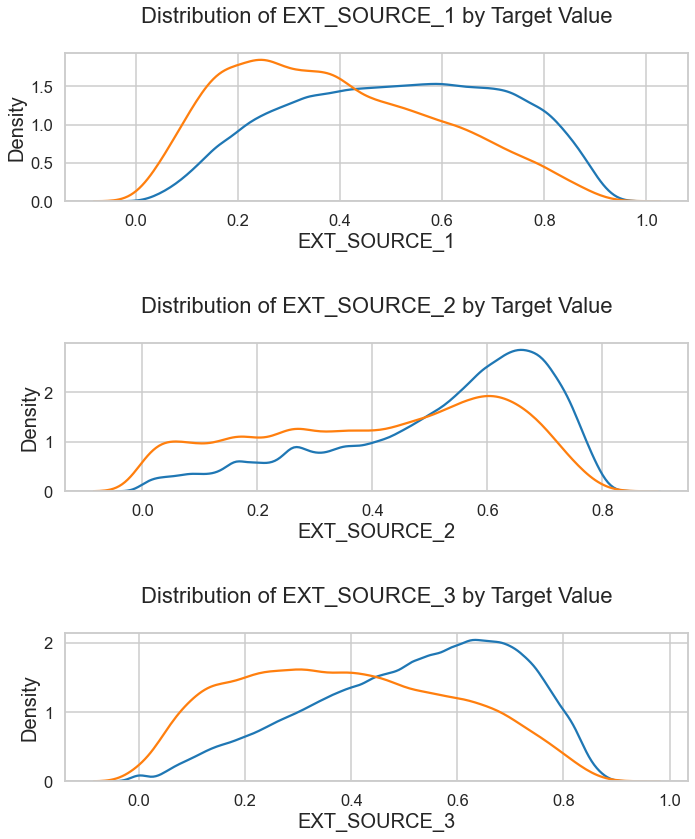

In [107]:
plt.figure(figsize = (10, 12))

externals= ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
for i, source in enumerate(externals):
    plt.subplot(3, 1, i + 1)
    sns.kdeplot(df_app.loc[df_app['TARGET'] == 0, source], label = 'target == 0')
    sns.kdeplot(df_app.loc[df_app['TARGET'] == 1, source], label = 'target == 1')
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)


* EXT_SOURCE_1 shows a similar distribution to the age of the client, which validates the positive correlation
* EXT_SOURCE_3 displays greatest difference between the values of the target so it can be a determining factor.